In [1]:
##System Path
import os, sys, numpy as np
root = os.getcwd()
path =root+"/../../"
img_dir = root+"/img"
sys.path.append(path)

if(not os.path.exists(img_dir)):
    os.mkdir(img_dir)
img_dir


'C:\\Users\\benja\\ubuntuHome\\Ensembler\\examples\\dev/img'

# Basic Examples
## Potential

In [2]:
#Four Well Potential
##Imports
import numpy as np
from ensembler.potentials.OneD import fourWellPotential
from ensembler.visualisation.plotPotentials import plot_potential

##Build potential
V = fourWellPotential(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)

##Visualize
positions = np.linspace(start=0, stop=11, num=1000) #phase space to be visualized
fig, outpath = plot_potential(potential=V, positions=positions, title="Four Well Potential")

In [3]:
fig, outpath = plot_potential(potential=V, positions=positions, title="Four Well Potential", out_path=img_dir+"/four_well.pdf")


Simulation:  Simulation: 100%|██████████| 1000/1000 [00:00<00:00, 6942.49it/s]


initializing Langevin old Positions	 




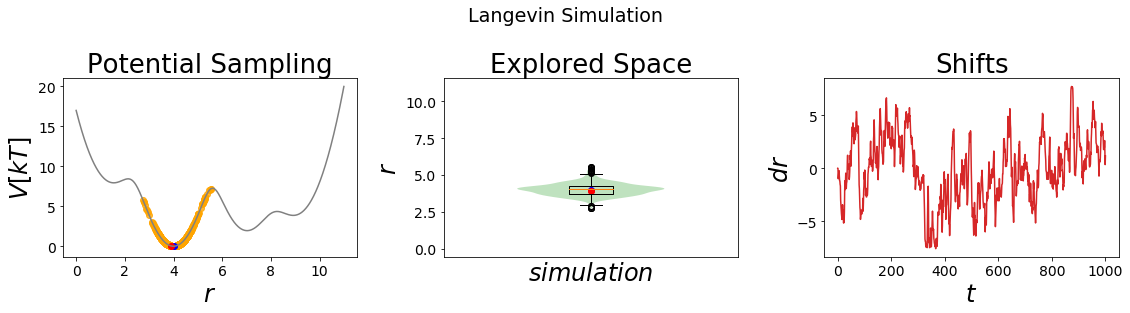

In [4]:
#Langevin integration simulation:
##Imports
from ensembler.potentials.OneD import fourWellPotential
from ensembler.samplers.stochastic import langevinIntegrator
from ensembler.system import system
from ensembler.visualisation.plotSimulations import simulation_analysis_plot

##Simulation Setup
V = fourWellPotential(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)

sampler = langevinIntegrator(dt=0.1, gamma=10)

system1 = system(potential=V, sampler=sampler,  start_position=4,  temperature=1)

##Simulate
cur_state = system1.simulate(steps=1000)

##Visualize
positions = np.linspace(start=0, stop=10, num=1000) #phase space to be visualized
fig, out_path = simulation_analysis_plot(system=system1, title="Langevin Simulation", limits_coordinate_space=positions)



In [6]:

fig, out_pSath = simulation_analysis_plot(system1, title="Langevin Simulation", limits_coordinate_space=positions, out_path=img_dir+"/langevin_simulation.png")



Simulation:  Simulation: 100%|██████████| 1000/1000 [00:04<00:00, 208.66it/s]


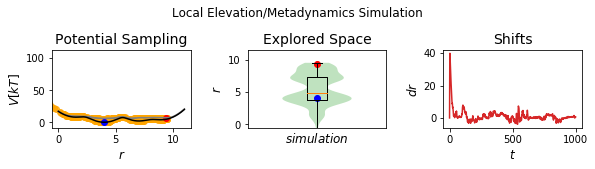

In [6]:
#Local elevation/metadynamics simulation:
##Imports
from ensembler.potentials.OneD import fourWellPotential, metadynamicsPotential
from ensembler.samplers.stochastic import langevinIntegrator
from ensembler.system import system
from ensembler.visualisation.plotSimulations import simulation_analysis_plot

##Simulation Setup
origpot = fourWellPotential(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)
V = metadynamicsPotential(origpot, amplitude=0.35, sigma=0.5, n_trigger=15)
sampler = langevinIntegrator(dt=0.1, gamma=10, old_position=3)

system2=system(potential=V, sampler=sampler, start_position=4, temperature=1)

##Simulate
cur_state = system2.simulate(steps=1000,withdraw_traj=True, init_system=True)

##Visualize
positions = np.linspace(start=0, stop=10, num=1000) #phase space to be visualized
fig, out_path = simulation_analysis_plot(system=system2, title="Local Elevation/Metadynamics Simulation", limits_coordinate_space=positions)
